In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a base
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables

print(list(Base.classes))


[<class 'sqlalchemy.ext.automap.measurement'>, <class 'sqlalchemy.ext.automap.station'>]


In [6]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table
measurements= Base.classes.measurement
station=Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
query = """
    SELECT
        MAX(date)
    FROM
        measurement
   
"""
with engine.connect() as conn:
    print(conn.execute(text(query)).fetchall())


[('2017-08-23',)]


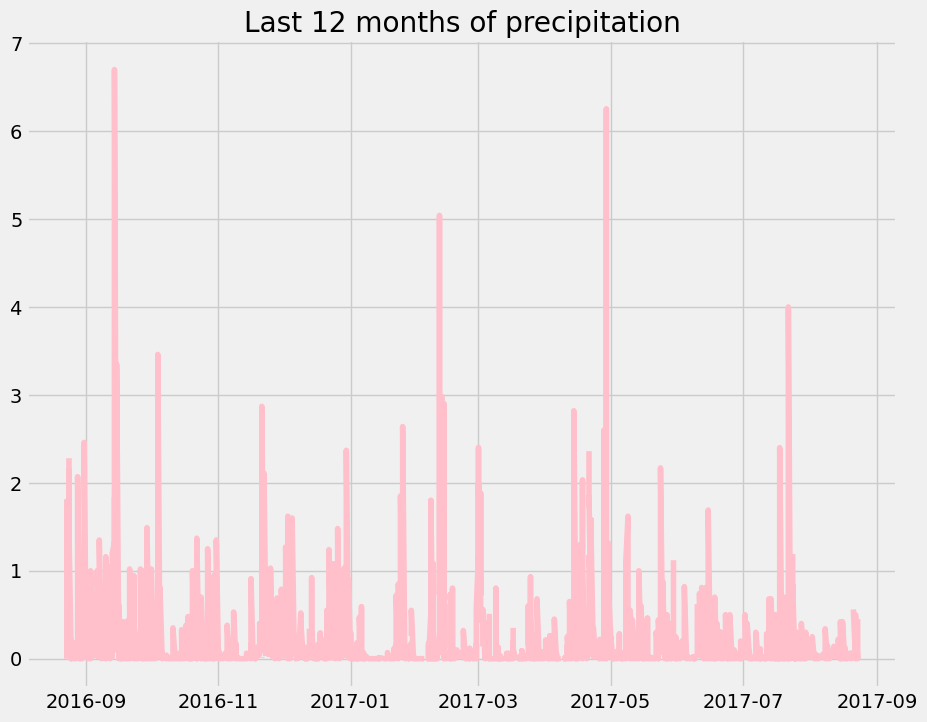

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
query = """
    SELECT
        date as Date,
        prcp as Precipitation
    FROM
        measurement
    WHERE
        date >= '2016-08-23'
    
    ORDER BY
        date ASC;
"""

# Save the query results as a Pandas DataFrame.

df = pd.read_sql(text(query), con=engine)
df

# Sort the dataframe by date
df['Date']=pd.to_datetime(df['Date'])
df


# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,8))
plt.plot(df.Date, df.Precipitation, color= 'pink' )
plt.title("Last 12 months of precipitation")
plt.show()

In [11]:
df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.Precipitation.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
query = """
    SELECT COUNT (station)
        
    FROM
        station
   
"""
with engine.connect() as conn:
    print(conn.execute(text(query)).fetchall())

[(9,)]


In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = """
    SELECT 
        station
    FROM
        measurement

"""

df2 = pd.read_sql(text(query), con=engine).value_counts()
df2


station    
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: count, dtype: int64

In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """
    SELECT 
        MIN(tobs) as lowest_temp,
        MAX(tobs) as highest_temp,
        AVG(tobs) as average_temp
    FROM
        measurement
    WHERE 
        station= 'USC00519281'
"""
with engine.connect() as conn:
    print(conn.execute(text(query)).fetchall())

[(54.0, 85.0, 71.66378066378067)]


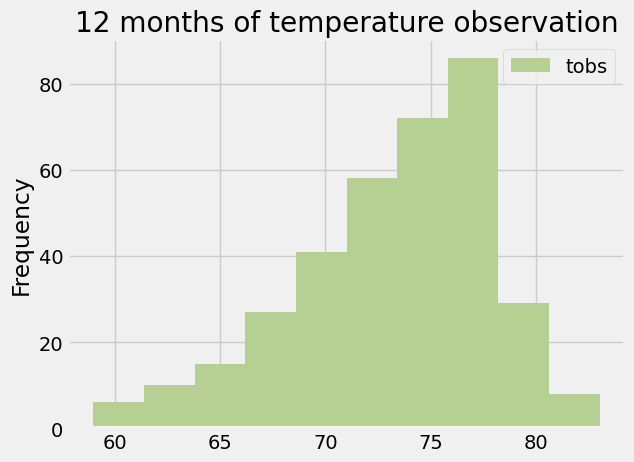

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = """
    SELECT 
        tobs
    FROM
        measurement
    WHERE
        date >= '2016-08-23'
    AND station= 'USC00519281'
"""
df3 = pd.read_sql(text(query), con=engine)
df3
df3.plot.hist(color='#B6D094')
plt.title("12 months of temperature observation")
plt.show()

# Close Session

In [55]:
# Close Session
session.close()